# Sports Data Analysis with Python

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Loading Dataset

df = pd.read_csv("matches.csv")
df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [3]:
# Missing Values

df.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [4]:
df = df.drop(['umpire3'],axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
dtypes: int64(5), object(12)
memory usag

#### Working with date column

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 756 entries, 0 to 755
Series name: date
Non-Null Count  Dtype         
--------------  -----         
756 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 6.0 KB


#### Dropping null rows

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

In [10]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


In [11]:
# Checking uniques values in All Categorical Columns

for columns in df.describe(include='object'):
    print(columns)
    print(df[columns].unique())
    print("\n"*2)

city
['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Mumbai' 'Kolkata' 'Bangalore'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' 'Mohali'
 'Bengaluru']



team1
['Sunrisers Hyderabad' 'Mumbai Indians' 'Gujarat Lions'
 'Rising Pune Supergiant' 'Kolkata Knight Riders'
 'Royal Challengers Bangalore' 'Delhi Daredevils' 'Kings XI Punjab'
 'Chennai Super Kings' 'Rajasthan Royals' 'Deccan Chargers'
 'Kochi Tuskers Kerala' 'Pune Warriors' 'Rising Pune Supergiants'
 'Delhi Capitals']



team2
['Royal Challengers Bangalore' 'Rising Pune Supergiant'
 'Kolkata Knight Riders' 'Kings XI Punjab' 'Sunrisers Hyderabad'
 'Mumbai Indians' 'Gujarat Lions' 'Delhi Daredevils' 'Rajasthan Royals'
 'Chennai Super Kings' 'Deccan Chargers' 'Pune Warriors'
 'Kochi Tuskers Kerala' 'Rising Pune Supergiants'

In [12]:
# checking description

df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,743.0,1786.578735,3455.045846,1.0,187.5,374.0,567.5,11415.0
season,743.0,2013.418573,3.378787,2008.0,2011.0,2013.0,2016.0,2019.0
dl_applied,743.0,0.025572,0.157961,0.0,0.0,0.0,0.0,1.0
win_by_runs,743.0,13.460296,23.626205,0.0,0.0,0.0,19.0,146.0
win_by_wickets,743.0,3.375505,3.393397,0.0,0.0,4.0,6.0,10.0


In [13]:
df.shape

(743, 17)

## Data Visualization and Observation

In [14]:
top_city =  df.city.value_counts()

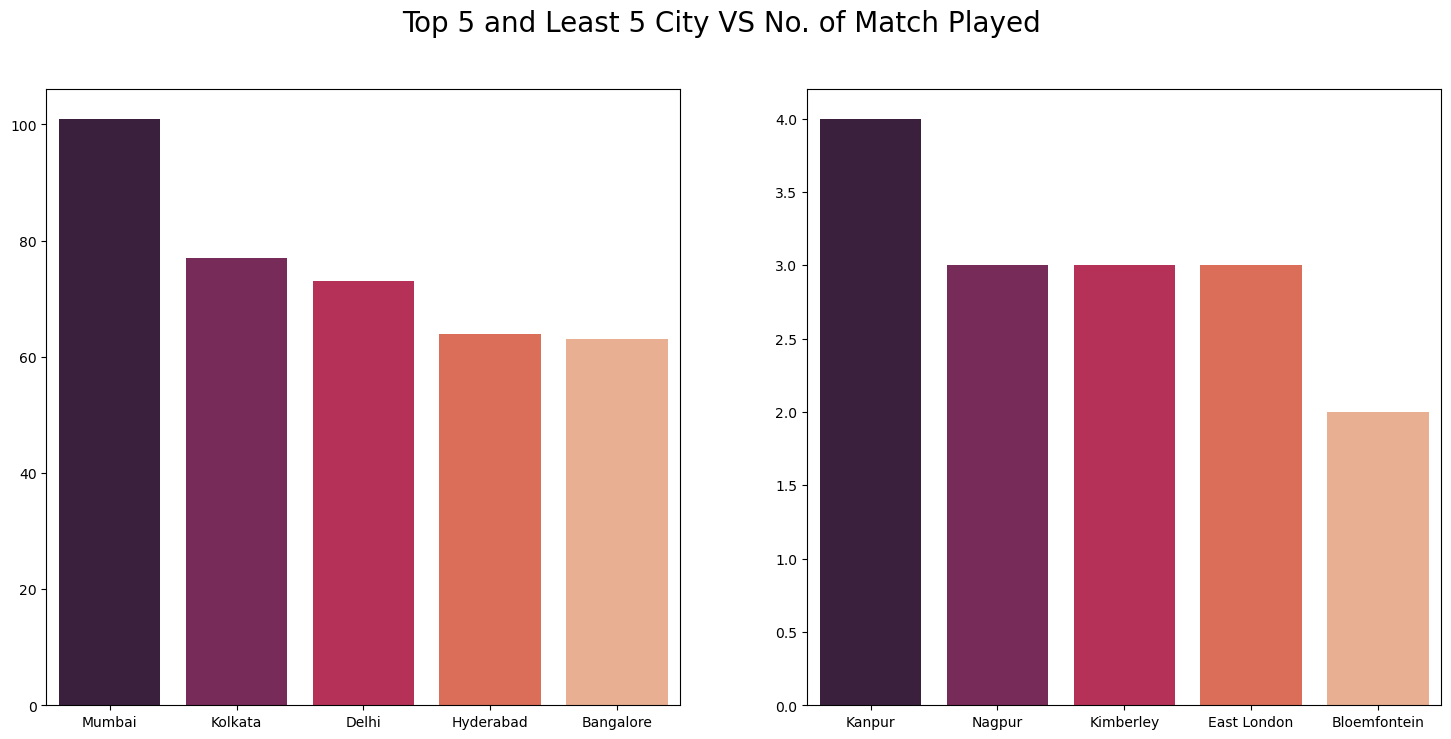

In [15]:
# Bar graph demonstrates Top 10 City with respect to No. Match Played

fig,axes = plt.subplots(1,2,figsize=(18,8),squeeze=False)

plt.suptitle("Top 5 and Least 5 City VS No. of Match Played",fontsize=20)

sns.barplot(ax =axes[0,0],x=top_city.index[:5],y=top_city.values[:5],palette='rocket')
sns.barplot(ax =axes[0,1],x=top_city.index[-5:],y=top_city.values[-5:],palette='rocket')

plt.show()

### Top 5 Cities with Highest Matches Played

***Mumbai =             101<br>
Kolkata  =          77<br>
Delhi    =          73<br>
Hyderabad  =        64<br>
Bangalore  =        63<br>
Chennai   =         57***

### Top 5 Cities with Least Matches Played

***Kanpur      =        4<br>
Nagpur        =      3<br>
Kimberley    =       3<br>
East London  =       3<br>
Bloemfontein  =      2***<br>

In [16]:
df_top_city = df[df['city'].isin(['Mumbai','Kolkata','Delhi','Hyderabad','Bangalore'])]

In [17]:
top_city_count = df_top_city[['city','season']].groupby(['city','season']).size().reset_index().rename(columns={0:"count"})

### Top 5 Cities with respective seasons with No. of Matches Played is shown below by Tabluar data:

In [18]:
top_city_count

,city,season,count
0,Bangalore,2008,7
1,Bangalore,2010,7
2,Bangalore,2011,6
3,Bangalore,2012,8
4,Bangalore,2013,8
5,Bangalore,2014,6
6,Bangalore,2015,5
7,Bangalore,2016,9
8,Bangalore,2017,7
9,Delhi,2008,6


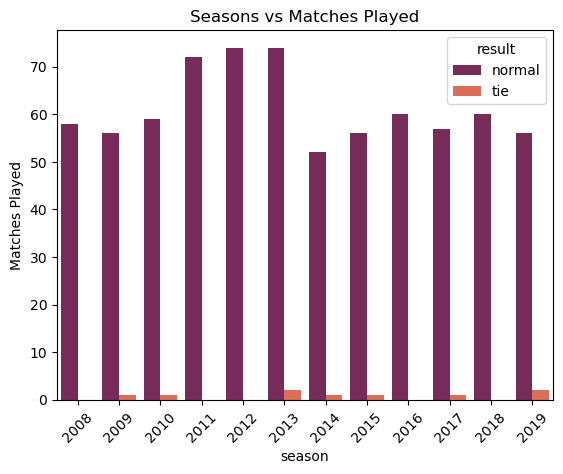

In [19]:
# Seasons vs Matches Played

plt.title("Seasons vs Matches Played")
ax = sns.countplot(x=df.season, data =df, palette='rocket',hue=df.result)
ax.set_xticklabels(ax.get_xticklabels(),rotation =45)
ax.set_ylabel("Matches Played")
plt.show(ax)

### Bar plot shows that TIE ratio is very minimum.
***Highest Matches played in years 2013,2012 and Lowest Matches played in years 2014 and 2015***

In [20]:
season_2008 = df[df['season']==2008].groupby(['winner','season']).size().reset_index().rename(columns={0:'Count'})

season_2009 = df[df['season']==2009].groupby(['winner','season']).size().reset_index().rename(columns={0:'Count'})

season_2010 = df[df['season']==2010].groupby(['winner','season']).size().reset_index().rename(columns={0:'Count'})

season_2011 = df[df['season']==2011].groupby(['winner','season']).size().reset_index().rename(columns={0:'Count'})

season_2012 = df[df['season']==2012].groupby(['winner','season']).size().reset_index().rename(columns={0:'Count'})

season_2013 = df[df['season']==2013].groupby(['winner','season']).size().reset_index().rename(columns={0:'Count'})

season_2014 = df[df['season']==2014].groupby(['winner','season']).size().reset_index().rename(columns={0:'Count'})

season_2015 = df[df['season']==2015].groupby(['winner','season']).size().reset_index().rename(columns={0:'Count'})

season_2016 = df[df['season']==2016].groupby(['winner','season']).size().reset_index().rename(columns={0:'Count'})

season_2017 = df[df['season']==2017].groupby(['winner','season']).size().reset_index().rename(columns={0:'Count'})

season_2018 = df[df['season']==2018].groupby(['winner','season']).size().reset_index().rename(columns={0:'Count'})

season_2019 = df[df['season']==2019].groupby(['winner','season']).size().reset_index().rename(columns={0:'Count'})




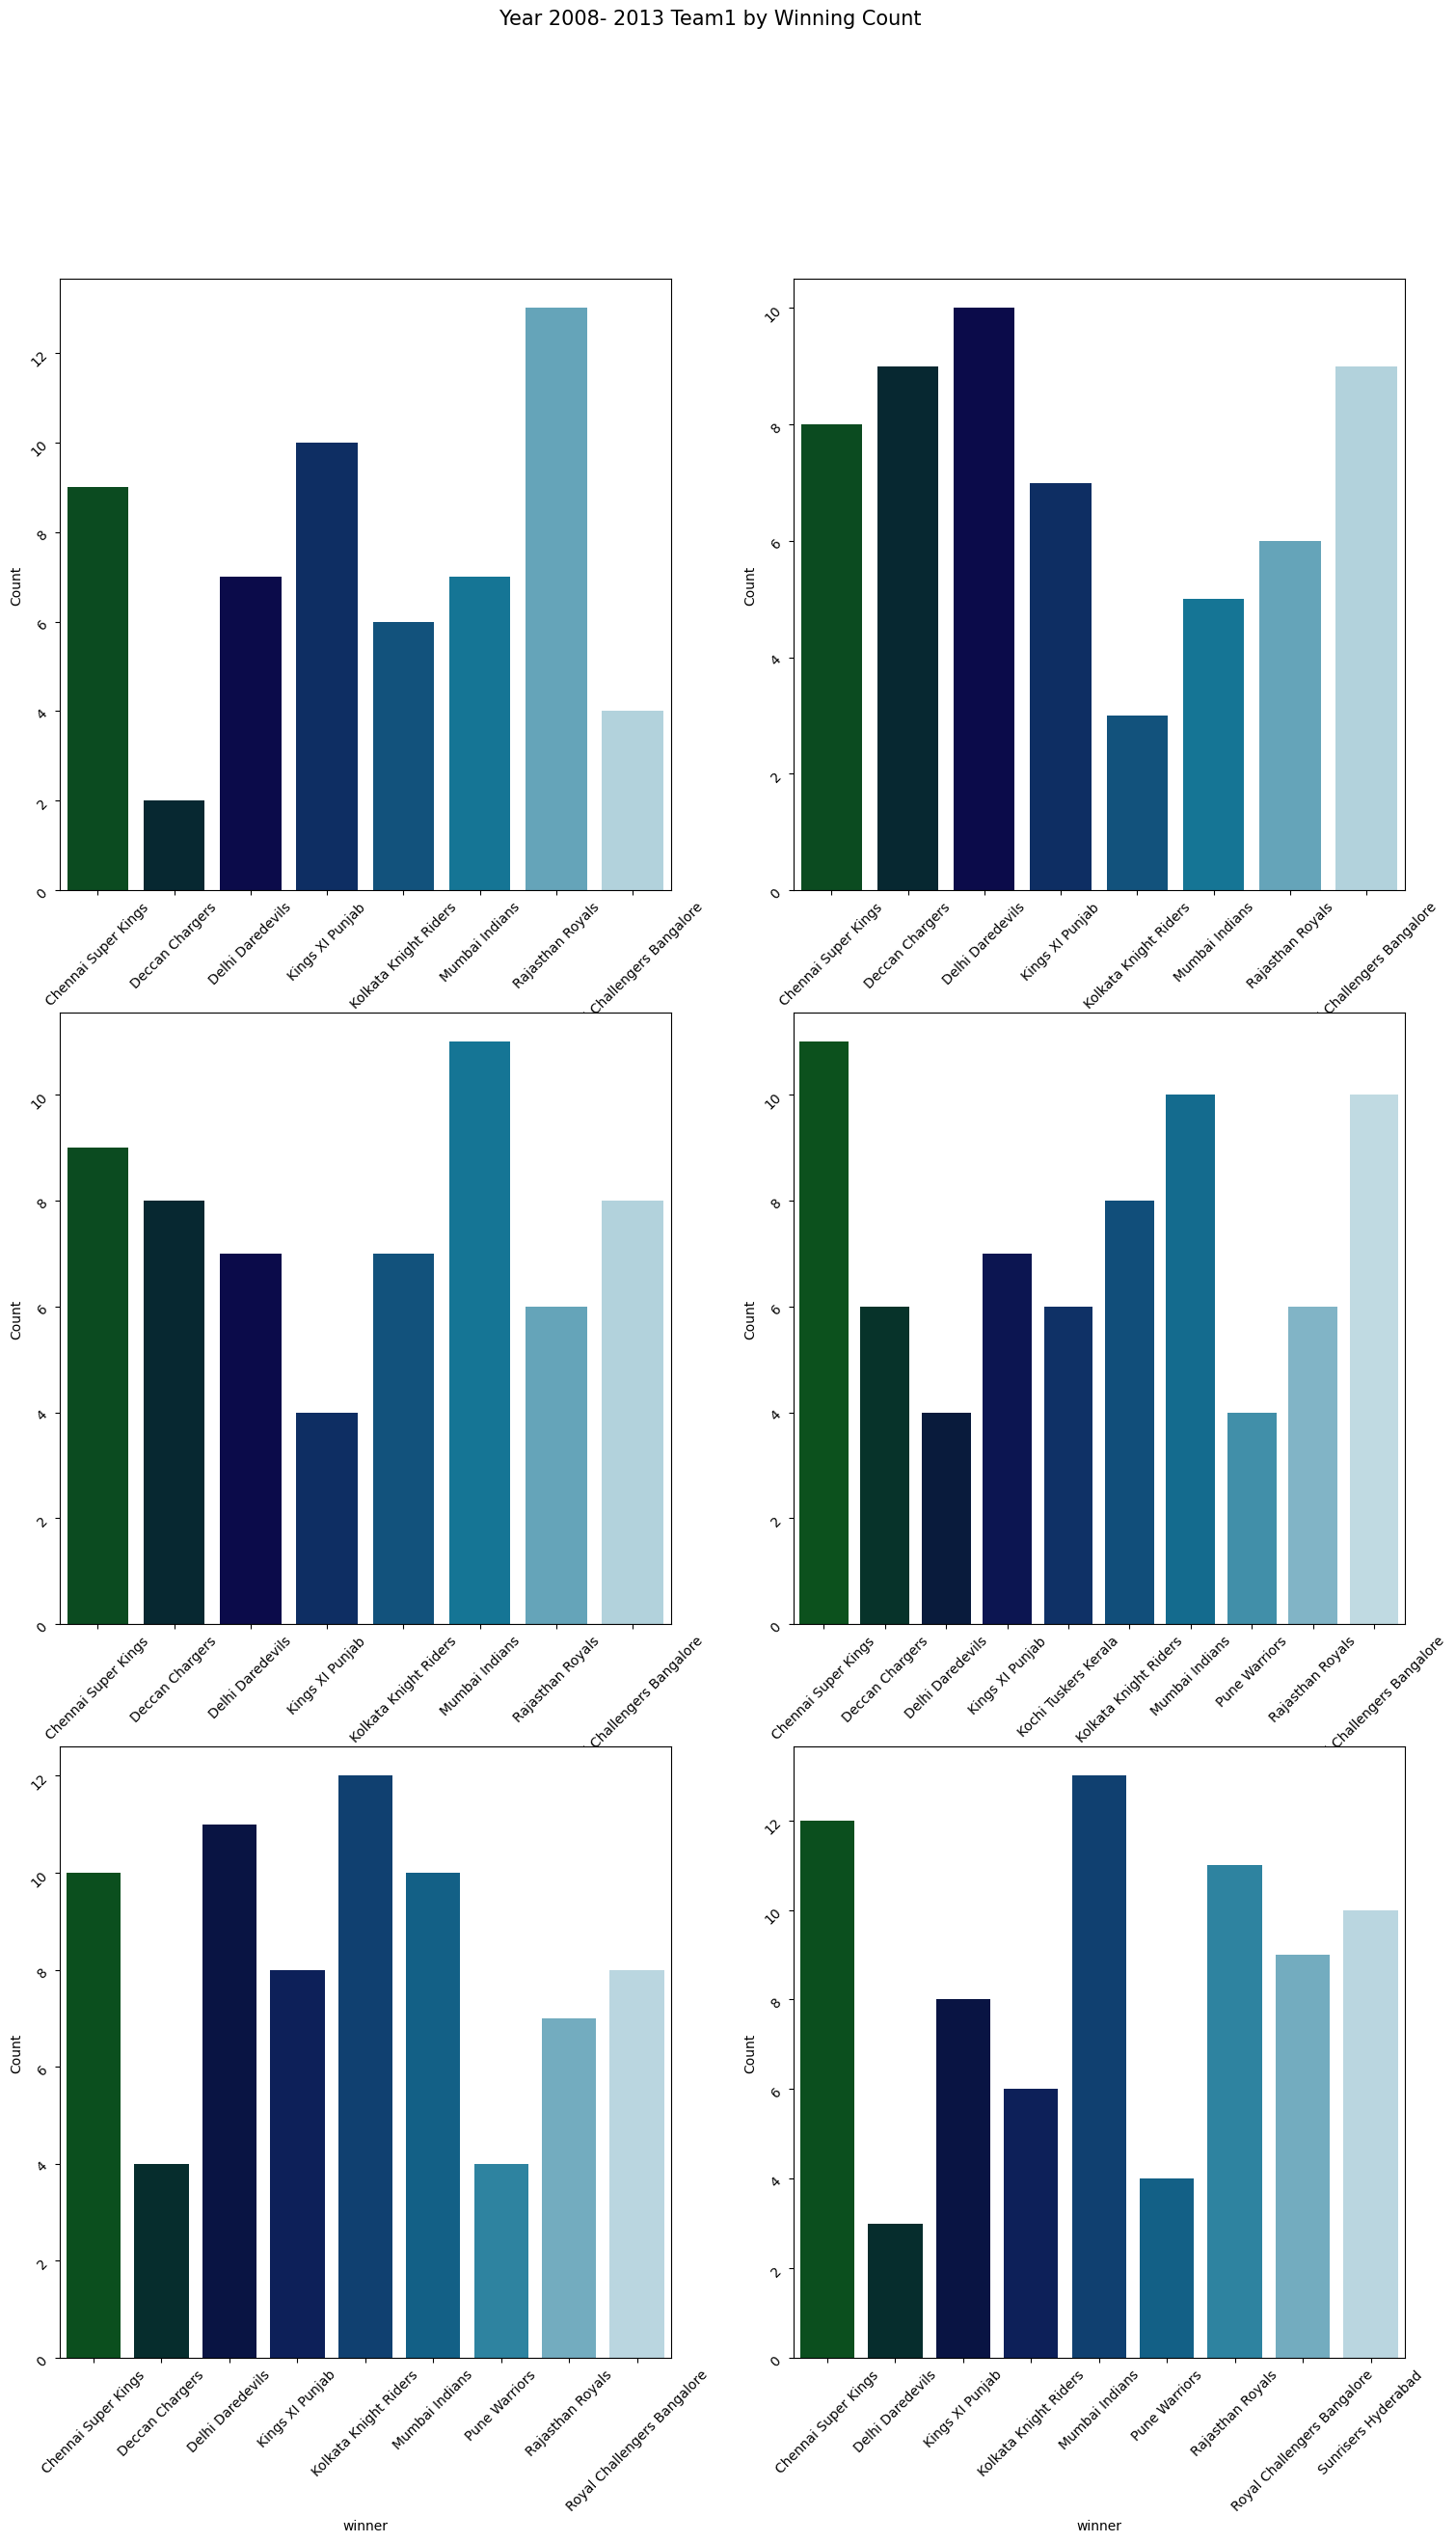

In [21]:
fig,axes = plt.subplots(3,2,figsize=(18,28),squeeze=False)

plt.suptitle("Year 2008- 2013 Team1 by Winning Count",fontsize=15)

sns.barplot(ax =axes[0,0],x=season_2008.winner, y=season_2008.Count, data=season_2008,palette='ocean')
sns.barplot(ax =axes[0,1],x=season_2009.winner, y=season_2009.Count, data=season_2009,palette='ocean')
sns.barplot(ax =axes[1,0],x=season_2010.winner, y=season_2010.Count, data=season_2010,palette='ocean')
sns.barplot(ax =axes[1,1],x=season_2011.winner, y=season_2011.Count, data=season_2011,palette='ocean')
sns.barplot(ax =axes[2,0],x=season_2012.winner, y=season_2012.Count, data=season_2012,palette='ocean')
sns.barplot(ax =axes[2,1],x=season_2013.winner, y=season_2013.Count, data=season_2013,palette='ocean')




axes[0,0].tick_params(labelrotation=45);
axes[0,1].tick_params(labelrotation=45);
axes[1,0].tick_params(labelrotation=45);
axes[1,1].tick_params(labelrotation=45);
axes[2,0].tick_params(labelrotation=45);
axes[2,1].tick_params(labelrotation=45);


plt.show()

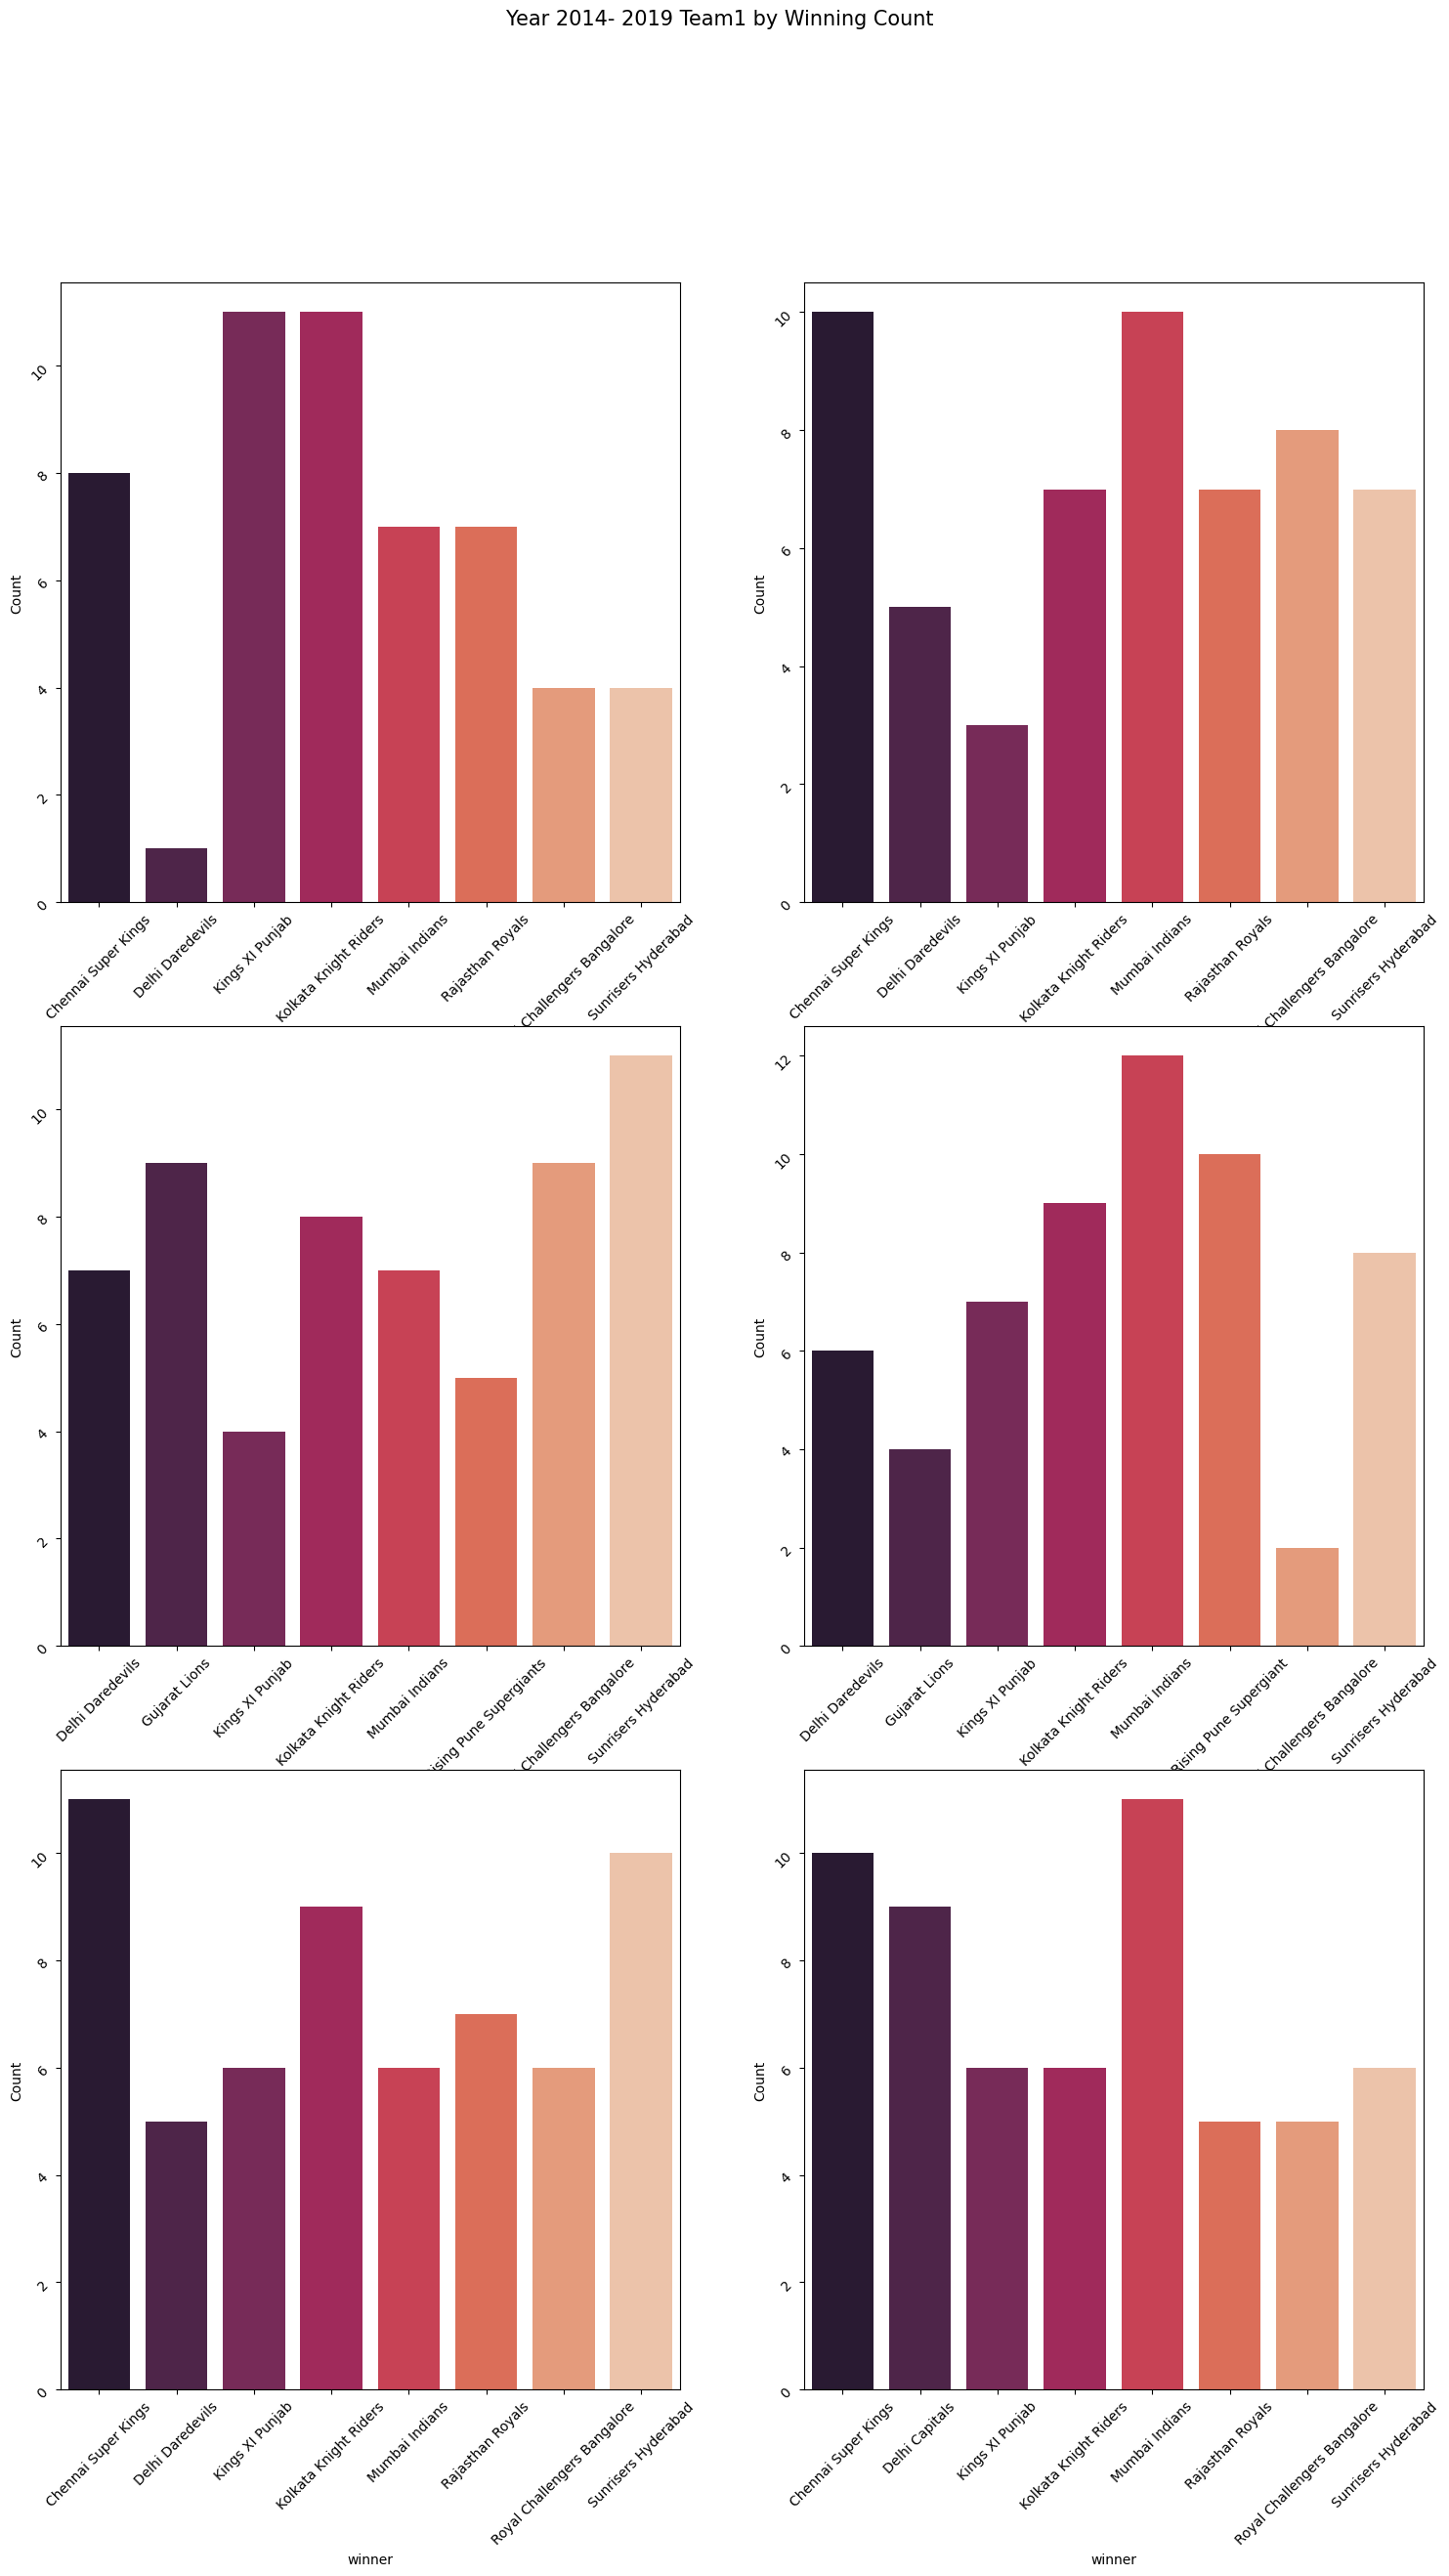

In [22]:
fig,axes = plt.subplots(3,2,figsize=(18,28),squeeze=False)

plt.suptitle("Year 2014- 2019 Team1 by Winning Count",fontsize=15)

sns.barplot(ax =axes[0,0],x=season_2014.winner, y=season_2014.Count, data=season_2014,palette='rocket')
sns.barplot(ax =axes[0,1],x=season_2015.winner, y=season_2015.Count, data=season_2015,palette='rocket')
sns.barplot(ax =axes[1,0],x=season_2016.winner, y=season_2016.Count, data=season_2016,palette='rocket')
sns.barplot(ax =axes[1,1],x=season_2017.winner, y=season_2017.Count, data=season_2017,palette='rocket')
sns.barplot(ax =axes[2,0],x=season_2018.winner, y=season_2018.Count, data=season_2018,palette='rocket')
sns.barplot(ax =axes[2,1],x=season_2019.winner, y=season_2019.Count, data=season_2019,palette='rocket')




axes[0,0].tick_params(labelrotation=45);
axes[0,1].tick_params(labelrotation=45);
axes[1,0].tick_params(labelrotation=45);
axes[1,1].tick_params(labelrotation=45);
axes[2,0].tick_params(labelrotation=45);
axes[2,1].tick_params(labelrotation=45);


plt.show()

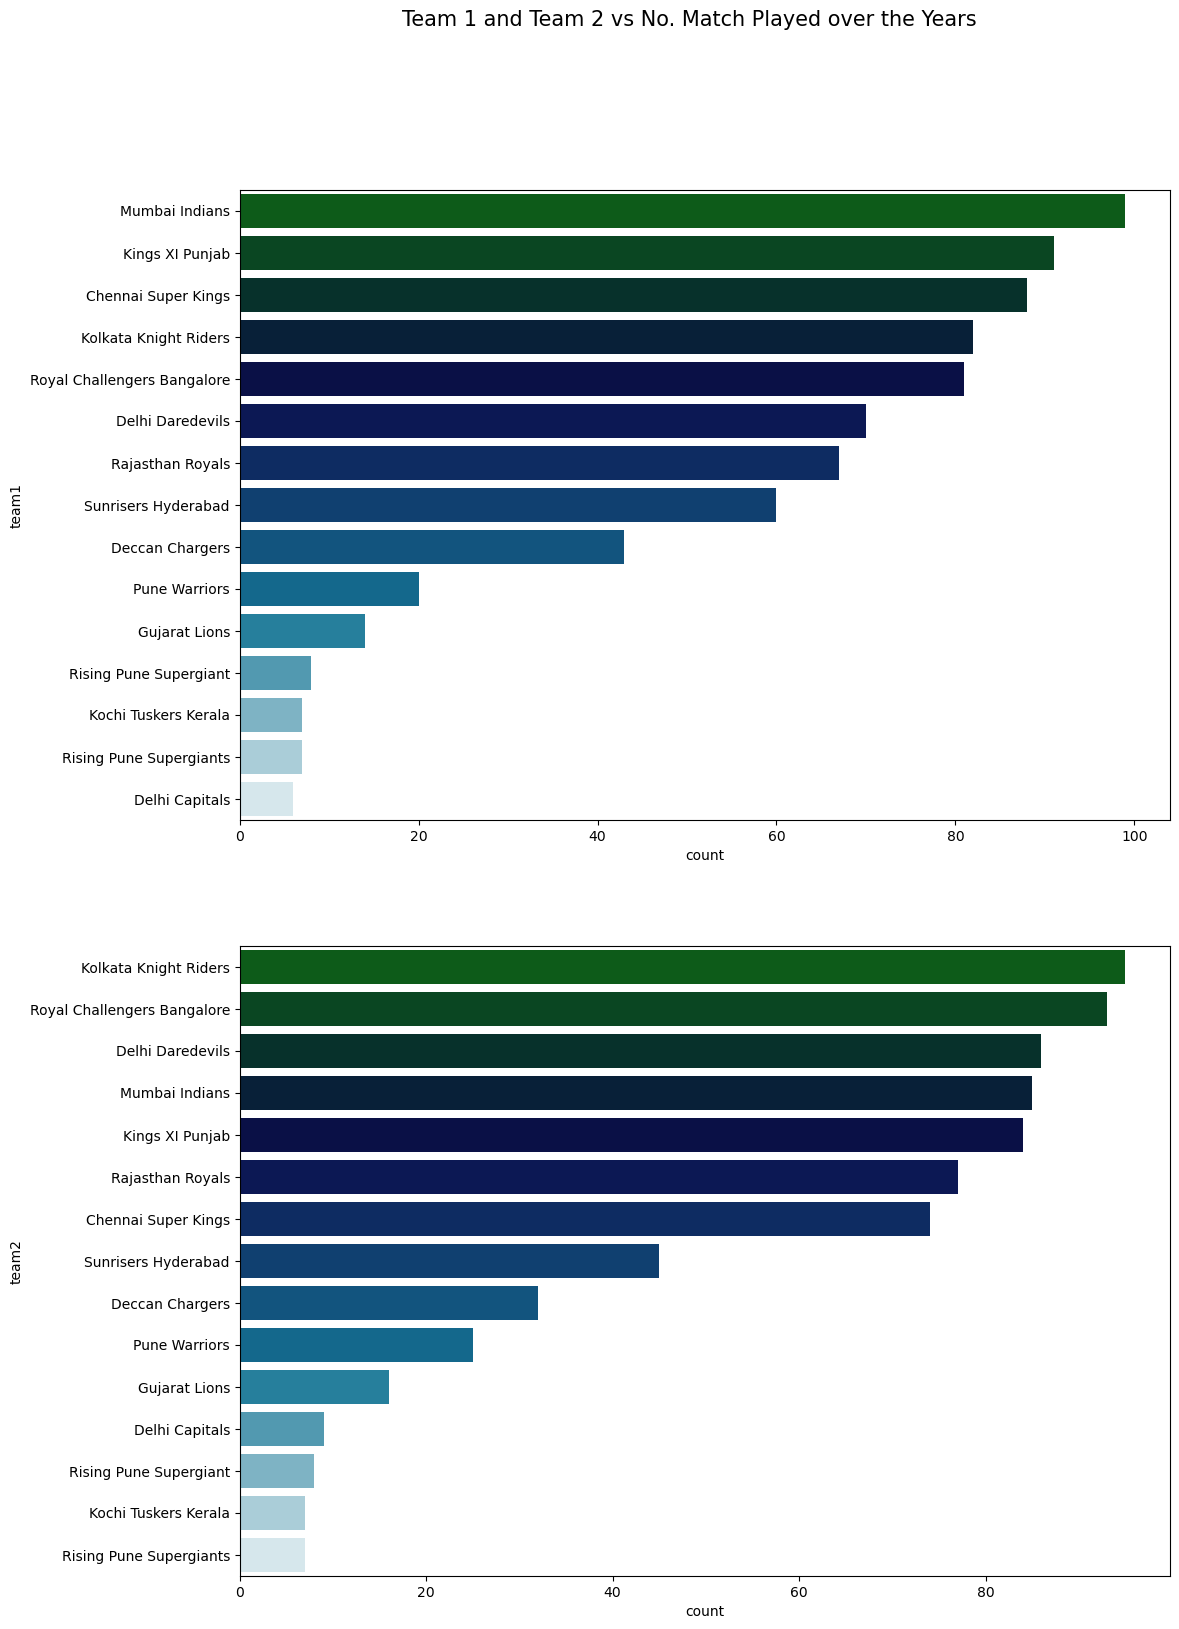

In [23]:
fig,axes = plt.subplots(2,1,figsize=(12,18),squeeze=False)

plt.suptitle("Team 1 and Team 2 vs No. Match Played over the Years",fontsize=15)

sns.countplot(ax=axes[0,0],y=df.team1,data=df,palette='ocean',order=df.team1.value_counts().index,orient='h')
sns.countplot(ax=axes[1,0],y=df.team2,data=df,palette='ocean',order=df.team2.value_counts().index,orient='h')

# axes[0,0].tick_params(labelrotation=90);
# axes[0,1].tick_params(labelrotation=90);

plt.show()

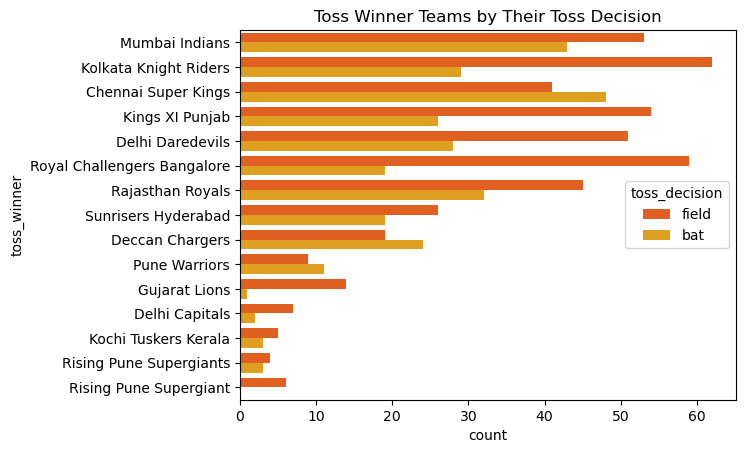

In [24]:
plt.title("Toss Winner Teams by Their Toss Decision")
sns.countplot(y=df.toss_winner,hue =df.toss_decision, data=df,palette='autumn',order=df.toss_winner.value_counts().index)
plt.show()

#### Winnng Teams tend to choose FIELDING normally.

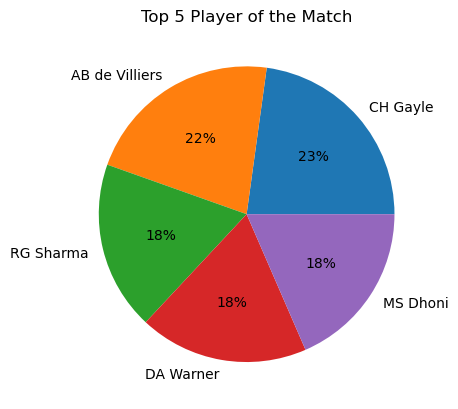

In [25]:
plt.title("Top 5 Player of the Match")
plt.pie(x = df.player_of_match.value_counts().values[:5],labels=df.player_of_match.value_counts().index[:5],autopct="%1.0f%%")
plt.show()

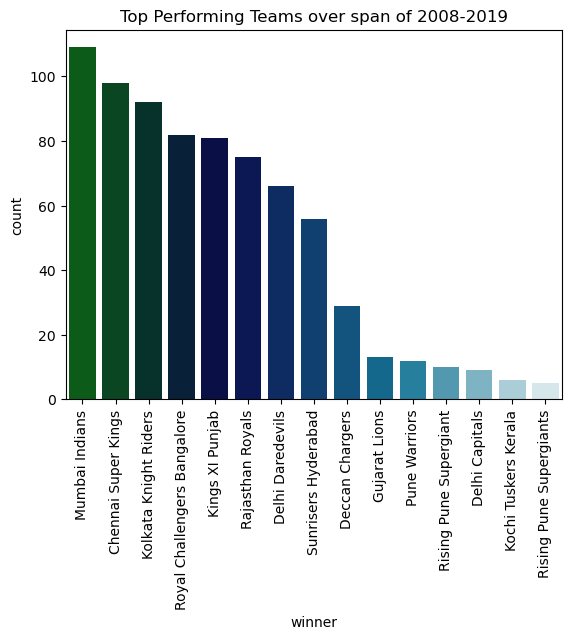

In [26]:
plt.title("Top Performing Teams over span of 2008-2019")
ax= sns.countplot(x=df.winner,data=df,palette='ocean',order=df.winner.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [27]:
top_winner = df.winner.value_counts().index[:10]

print(f"Top 10 Winning Teams over the Years are:\n\n {top_winner}")


Top 10 Winning Teams over the Years are:

 Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders',
       'Royal Challengers Bangalore', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Sunrisers Hyderabad', 'Deccan Chargers',
       'Gujarat Lions'],
      dtype='object')


In [28]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong


**Top 7 Umpires1 by Matches Played**

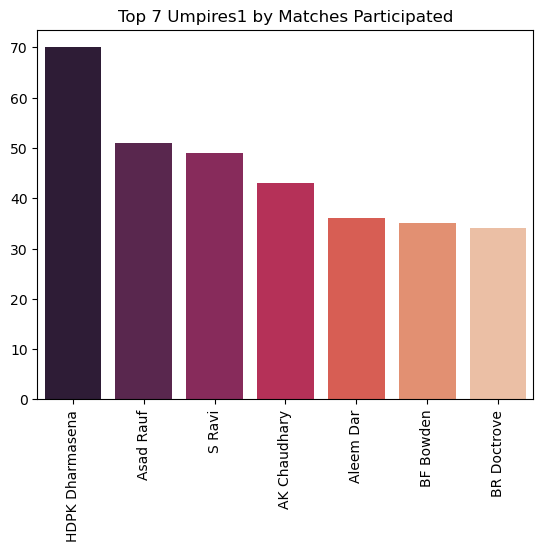

In [29]:
plt.title("Top 7 Umpires1 by Matches Participated")
ax = sns.barplot(x = df.umpire1.value_counts().index[:7], y= df.umpire1.value_counts().values[:7],data=df,palette = 'rocket')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

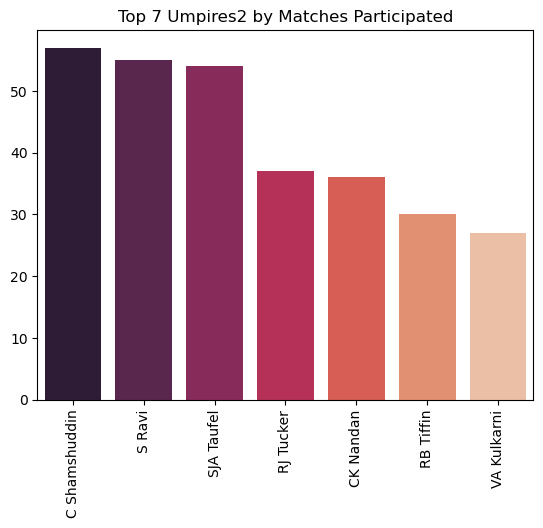

In [30]:
plt.title("Top 7 Umpires2 by Matches Participated")
ax = sns.barplot(x = df.umpire2.value_counts().index[:7], y= df.umpire2.value_counts().values[:7],data=df,palette = 'rocket')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

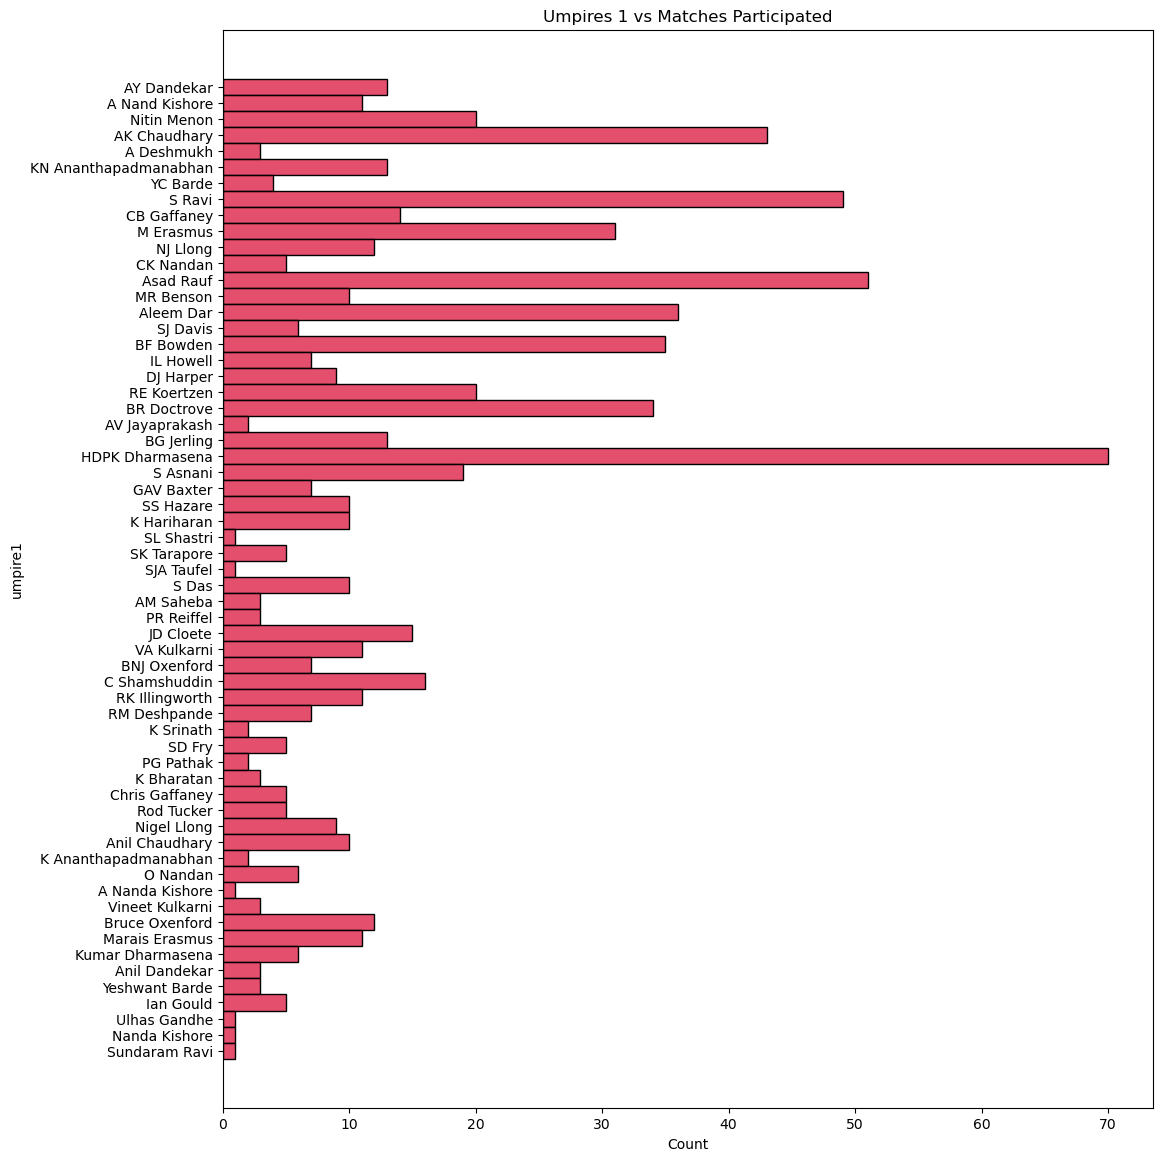

In [31]:
plt.figure(figsize=(12,14))
plt.title("Umpires 1 vs Matches Participated")
ax = sns.histplot(y=df.umpire1,data =df, color ='crimson')
plt.show()

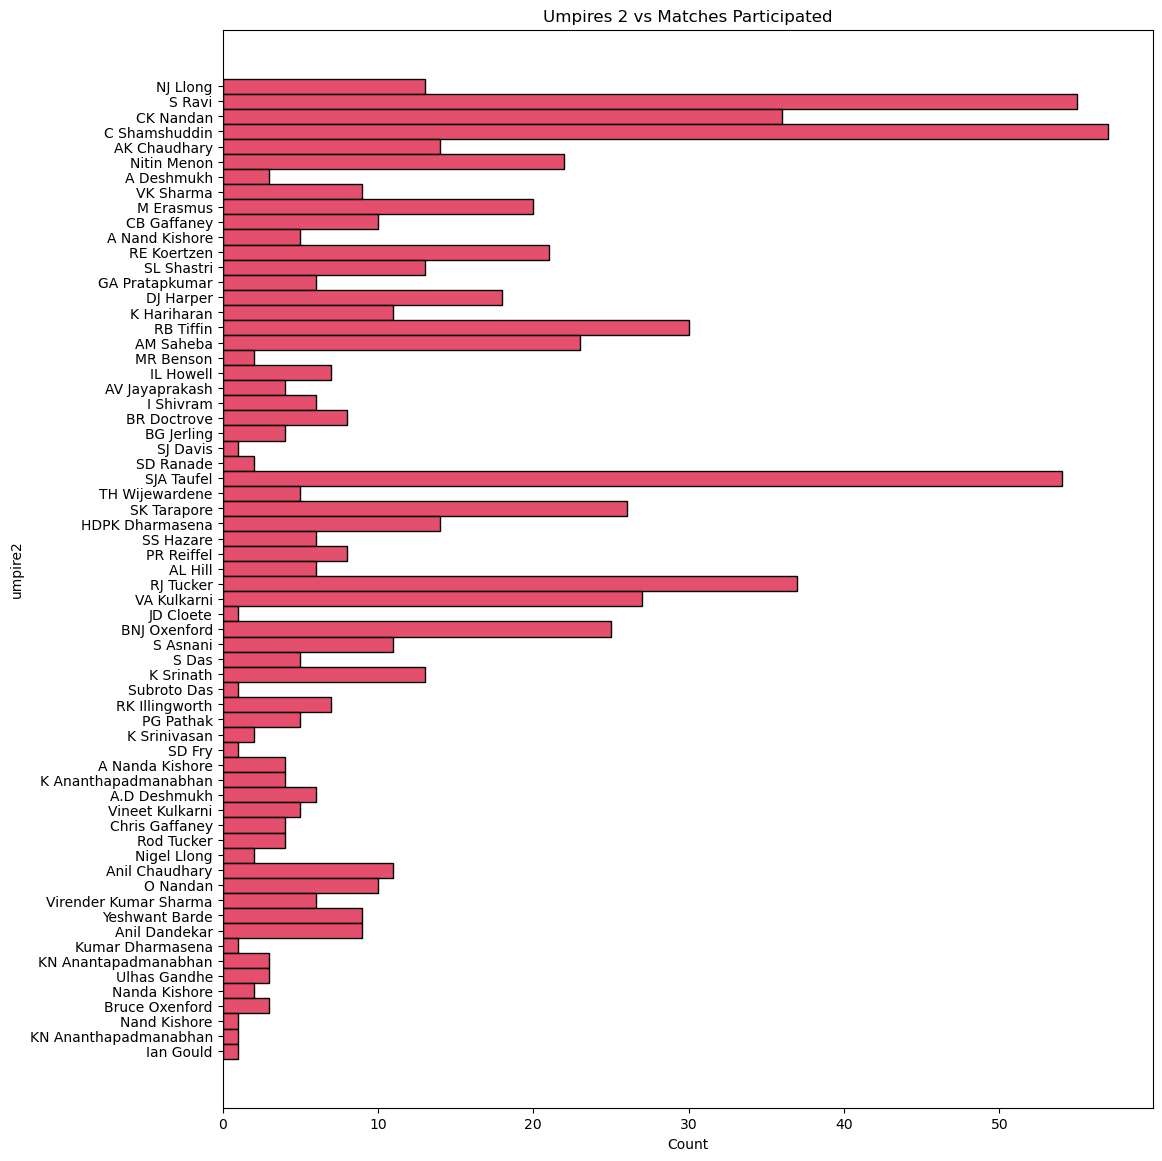

In [32]:
plt.figure(figsize=(12,14))
plt.title("Umpires 2 vs Matches Participated")
ax = sns.histplot(y=df.umpire2,data =df, color ='crimson')
plt.show()

In [33]:
umpires1_list = []

for i in df.umpire1.unique():
    umpires1_list.append(i)

In [34]:
umpires2_list = []

for i in df.umpire2.unique():
    umpires2_list.append(i)

In [35]:
set1 = set(umpires1_list)
set2 = set(umpires2_list)

In [36]:
similar_umpires_name = set1.intersection(set2)


#### Umpires who are both in list of Umpire1 and Umpire2 are:

In [37]:
similar_umpires_name

{'A Deshmukh',
 'A Nand Kishore',
 'A Nanda Kishore',
 'AK Chaudhary',
 'AM Saheba',
 'AV Jayaprakash',
 'Anil Chaudhary',
 'Anil Dandekar',
 'BG Jerling',
 'BNJ Oxenford',
 'BR Doctrove',
 'Bruce Oxenford',
 'C Shamshuddin',
 'CB Gaffaney',
 'CK Nandan',
 'Chris Gaffaney',
 'DJ Harper',
 'HDPK Dharmasena',
 'IL Howell',
 'Ian Gould',
 'JD Cloete',
 'K Ananthapadmanabhan',
 'K Hariharan',
 'K Srinath',
 'KN Ananthapadmanabhan',
 'Kumar Dharmasena',
 'M Erasmus',
 'MR Benson',
 'NJ Llong',
 'Nanda Kishore',
 'Nigel Llong',
 'Nitin Menon',
 'O Nandan',
 'PG Pathak',
 'PR Reiffel',
 'RE Koertzen',
 'RK Illingworth',
 'Rod Tucker',
 'S Asnani',
 'S Das',
 'S Ravi',
 'SD Fry',
 'SJ Davis',
 'SJA Taufel',
 'SK Tarapore',
 'SL Shastri',
 'SS Hazare',
 'Ulhas Gandhe',
 'VA Kulkarni',
 'Vineet Kulkarni',
 'Yeshwant Barde'}

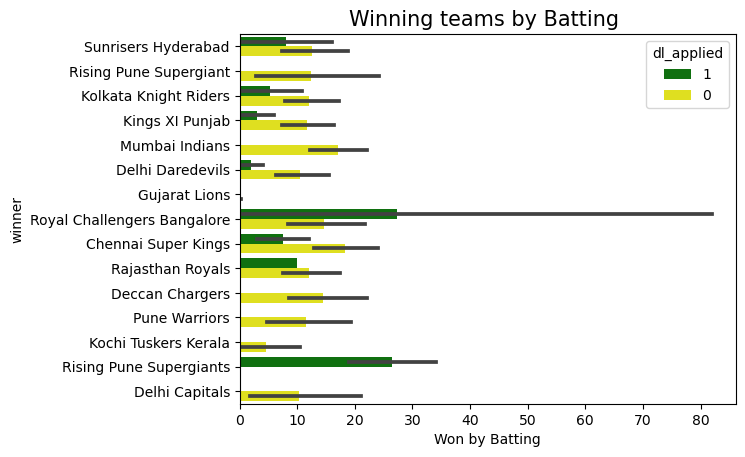

In [38]:
plt.title("Winning teams by Batting ",fontsize=15)
ax =sns.barplot(y=df.winner,x=df.win_by_runs,data=df,palette=['green','yellow'],hue=df.dl_applied,hue_order=[1,0])
plt.xlabel("Won by Batting")
plt.show()

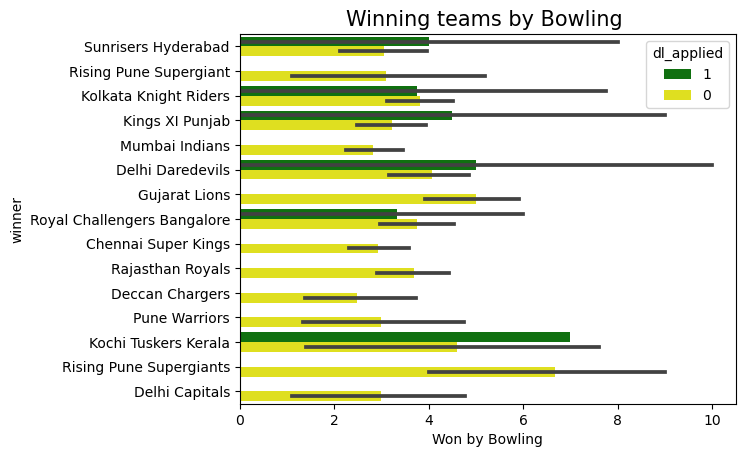

In [39]:
plt.title("Winning teams by Bowling ",fontsize=15)
ax =sns.barplot(y=df.winner,x=df.win_by_wickets,data=df,palette=['green','yellow'],hue=df.dl_applied,hue_order=[1,0])
plt.xlabel("Won by Bowling")
plt.show()

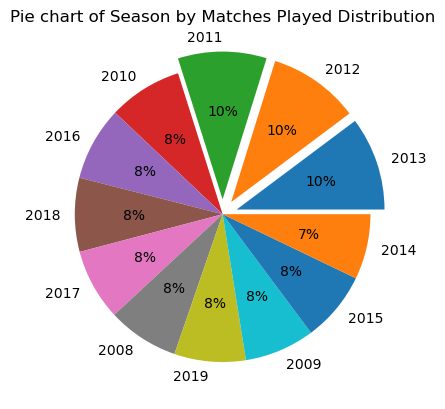

In [40]:
plt.title("Pie chart of Season by Matches Played Distribution")

explode = [0.1, 0.1, 0.1, 0, 0,0,0,0,0,0,0,0]

plt.pie(x = df.season.value_counts().values,labels=df.season.value_counts().index,autopct="%1.0f%%",explode =explode)

plt.show()

### Cities with Their Venues names

In [41]:

stadiums_in_city = df[['city','venue']].groupby(['city','venue']).nunique()
stadiums_in_city

Empty DataFrame
Columns: []
Index: [(Abu Dhabi, Sheikh Zayed Stadium), (Ahmedabad, Sardar Patel Stadium, Motera), (Bangalore, M Chinnaswamy Stadium), (Bengaluru, M Chinnaswamy Stadium), (Bengaluru, M. Chinnaswamy Stadium), (Bloemfontein, OUTsurance Oval), (Cape Town, Newlands), (Centurion, SuperSport Park), (Chandigarh, Punjab Cricket Association IS Bindra Stadium, Mohali), (Chandigarh, Punjab Cricket Association Stadium, Mohali), (Chennai, M. A. Chidambaram Stadium), (Chennai, MA Chidambaram Stadium, Chepauk), (Cuttack, Barabati Stadium), (Delhi, Feroz Shah Kotla), (Delhi, Feroz Shah Kotla Ground), (Dharamsala, Himachal Pradesh Cricket Association Stadium), (Durban, Kingsmead), (East London, Buffalo Park), (Hyderabad, Rajiv Gandhi International Stadium, Uppal), (Hyderabad, Rajiv Gandhi Intl. Cricket Stadium), (Indore, Holkar Cricket Stadium), (Jaipur, Sawai Mansingh Stadium), (Johannesburg, New Wanderers Stadium), (Kanpur, Green Park), (Kimberley, De Beers Diamond Oval), (Kochi, Nehru Stadium), (Kolkata, Eden Gardens), (Mohali, IS Bindra Stadium), (Mohali, Punjab Cricket Association IS Bindra Stadium, Mohali), (Mumbai, Brabourne Stadium), (Mumbai, Dr DY Patil Sports Academy), (Mumbai, Wankhede Stadium), (Nagpur, Vidarbha Cricket Association Stadium, Jamtha), (Port Elizabeth, St George's Park), (Pune, Maharashtra Cricket Association Stadium), (Pune, Subrata Roy Sahara Stadium), (Raipur, Shaheed Veer Narayan Singh International Stadium), (Rajkot, Saurashtra Cricket Association Stadium), (Ranchi, JSCA International Stadium Complex), (Sharjah, Sharjah Cricket Stadium), (Visakhapatnam, ACA-VDCA Stadium), (Visakhapatnam, Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium)]

# Thank You